In [1]:
#importing dependencies for data wrangling
import numpy as np
import pandas as pd
import os

In [92]:
# importing data for data visualization
import matplotlib.pyplot as plt
from mglearn.plot_helpers import discrete_scatter,cm3, cm2
from mglearn.plots import plot_2d_separator 

In [40]:
# importing machine learning modules
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import euclidean_distances
from sklearn.model_selection import train_test_split

# K-Nearest Neighbors Regression

### Creating a synthetic dataset using sklearn for Regression

##### This function will generate synthetic data for us to use further down the line for building our regression model. We will use a scatterplot for visualization

In [67]:
def make_wave(n_samples=100):
    # generating the data 
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4*x)+x)
    y = (y_no_noise + rnd.normal(size=len(x)))/2

    return x.reshape(-1,1), y

In [68]:
X, y = make_wave()

##### Analysis and visualization

In [69]:
df_x = pd.DataFrame(X)
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
dtypes: float64(1)
memory usage: 932.0 bytes


In [70]:
df_y = pd.DataFrame(y)
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
dtypes: float64(1)
memory usage: 932.0 bytes


###### we observe there are two variable for a feature and target valuse

X.shape: (100, 1)


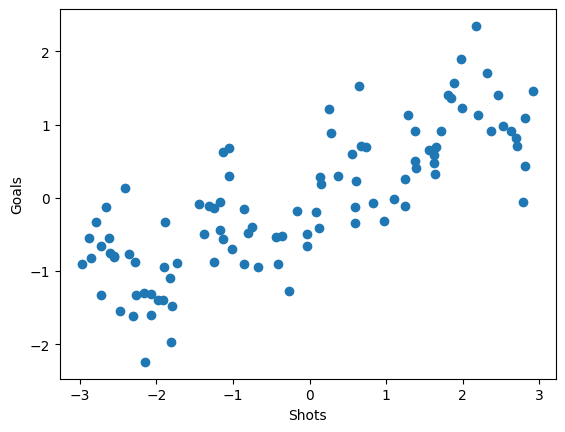

In [78]:
plt.plot(X, y, 'o')
plt.xlabel("Shots")
plt.ylabel("Goals")
print("X.shape: {}". format(X.shape))

###### From the visualiztion we can observe the points follow a specific pattern we can be sure that as as the number of the shots increases the goals will also increase

### Applying the k-nearest neighbors algorithm 

In [72]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [73]:
# Initializing the model to 3 neighbors
clf = KNeighborsRegressor(n_neighbors=3)

In [74]:
#Fitting the model with data
clf.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [75]:
# Making predictions
print("Test set predictions: {}". format(clf.predict(X_test)))

Test set predictions: [-0.79266538  0.42776943  0.42776943  1.11237602  0.42776943  0.89609343
  0.00297044  1.33380525  0.66577669 -0.34456666  1.65825902  0.46201371
 -0.59416201 -0.79266538  1.7619226   0.66577669 -0.35075036 -0.53657219
  0.52456939  0.66577669  1.11237602  1.33380525  0.66577669 -0.79266538
  0.19927087]


In [76]:
# Calculating accuracy
print("Test set R^2: {:.2f}".format(clf.score(X_test, y_test)))

Test set R^2: 0.67


###### We can observe that the r squared value of the model is 0.67

### Visualizing the predictions

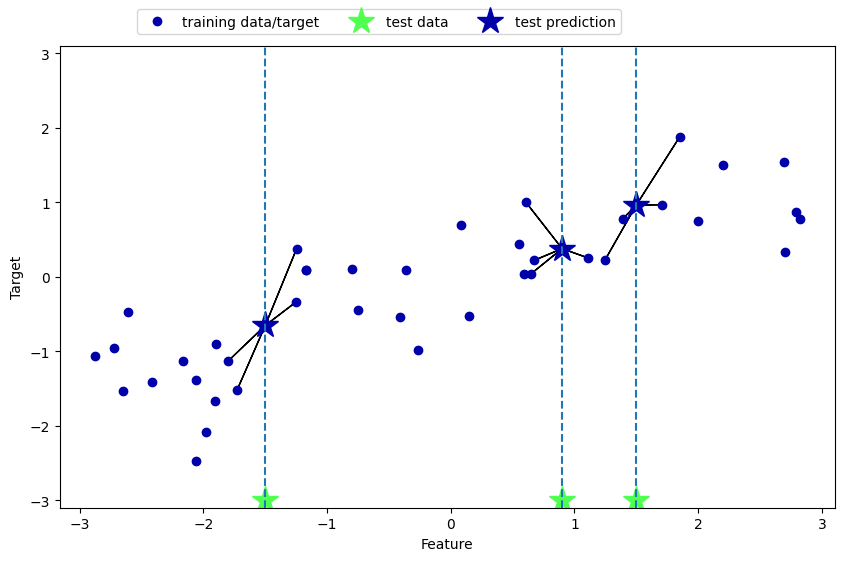

In [90]:
def plot_knn_regression(n=1):
    X, y = make_wave(40)
    X_test = np.array([[-1.5], [0.9], [1.5]])

    dist = euclidean_distances(X, X_test)
    closest = np.argsort(dist, axis=0)

    plt.figure(figsize=(10,6))

    reg = KNeighborsRegressor(n_neighbors=n).fit(X, y)
    y_pred = reg.predict(X_test)

    for x, y_, neighbors, in zip(X_test, y_pred, closest.T):
            for neighbor in neighbors[:n]:
                plt.arrow(x[0], y_, X[neighbor, 0] - x[0], y[neighbor] - y_,
                         head_width=0, fc='k', ec='k')
    train, = plt.plot(X, y, 'o', c=cm3(0))
    test, = plt.plot(X_test, -3*np.ones(len(X_test)), '*', c=cm3(2), 
                    markersize=20)
    pred, = plt.plot(X_test, y_pred, '*', c=cm3(0), markersize=20)
    plt.vlines(X_test, -3.1, 3.1, linestyles="--")
    plt.legend([train, test, pred],
              ["training data/target", "test data", "test prediction"],
               ncol=3, loc=(.1, 1.025))
    plt.ylim(-3.1,3.1)
    plt.xlabel("Feature")
    plt.ylabel("Target")

   

plot_knn_regression(4)


- ##### From the above graph we can observe that the knn model uses a voting system where the n nearest points are considered if given a feature it will predict the target variable according to this system

### Analysing the regressor 

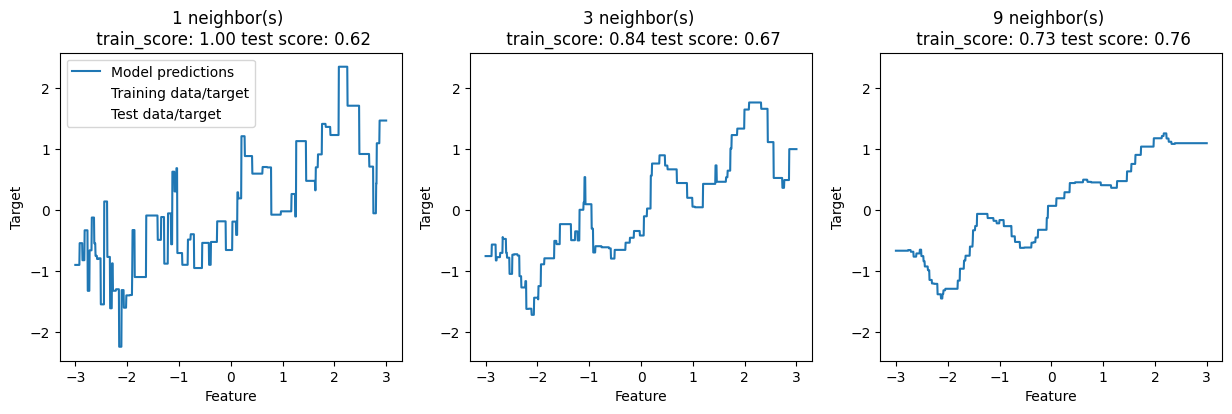

In [95]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3,3,1000).reshape(-1,1)
# Plotting for different number of neighbors
for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X_train,y_train)
    ax.plot(line, clf.predict(line))
    ax.plot(X_train, y_train, '^', c=cm2(0), markersize=0)
    ax.plot(X_test, y_test, 'v', c=cm2(1), markersize=0)
    
    ax.set_title("{} neighbor(s) \n train_score: {:.2f} test score: {:.2f}".format(
        n_neighbors, clf.score(X_train, y_train), clf.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")

-  ##### As visible on the left in the graph that using a single neighbor results in a decision boundary that follows the data closely
-  ##### Considering more and more points leads to a smoother decision boundary
-  ##### This means that using few neighbors contributes to model complexity and using many neighbors coresponds to simpler models